> Created by Teodora Szasz, tszasz@uchicago.edu

# <h1 align="center">2. Interactive Data Analysis with pandas</h1>

### A. Downloading the data (Red Light Camera Violations since July 1, 2014)
- The dataset we are going to analyze contains the Red Light Camera Violations created by the City of Chicago Red Light Program for each camera.
- The data reflects violations that occurred from July 1, 2014 until present, minus the most recent 14 days.
- The data can be found at: https://data.cityofchicago.org/Transportation/Red-Light-Camera-Violations/spqx-js37
- Other public datasets can be found on City of Chicago Data Portal: https://data.cityofchicago.org/

- Let's download the data (36.92 MB, .CSV format):
- The name of the file: Red_Light_Camera_Violations.csv

In [196]:
!wget -O Red_Light_Camera_Violations.csv https://data.cityofchicago.org/api/views/spqx-js37/rows.csv?accessType=DOWNLOAD

--2017-01-15 19:05:35--  https://data.cityofchicago.org/api/views/spqx-js37/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org... 52.206.140.199
Connecting to data.cityofchicago.org|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Red_Light_Camera_Violations.csv’

Red_Light_Camera_Vi     [                <=> ]  36.92M  1.22MB/s    in 33s     

Last-modified header invalid -- time-stamp ignored.
2017-01-15 19:06:09 (1.12 MB/s) - ‘Red_Light_Camera_Violations.csv’ saved [38714274]



- It contains 246935 entries - 36.92 MB
- compared to "Crimes from 2001 to present" dataset: - more than 6 million entries - 1.23 GB

In [166]:
!ls

1_Introducing_IPython_Notebook.ipynb
2_Interactive_Data_Analysis_with_pandas.ipynb
Red_Light_Camera_Violations.csv
cookbook-code
test.txt


- Let's import a few packages we will need here:
- We also instruct matplotlib to render the figures as PNG images in the notebook.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### B. Loading the dataset

- Tip: do not hesitate to use tab completion each time you can

In [176]:
data_filename = 'Red_Light_Camera_Violations.csv'
data = pd.read_csv(data_filename, parse_dates=True)

- `data` variable is a DataFrame object. A DataFrame is a table containing rows (observations) and columns (variables).

- `head()` method displays the first few lines (here, three) of the table:

In [177]:
data.head(3)

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121.0,3100 S DR MARTIN L KING,08/02/2014,16,NaN,NaN,NaN,NaN,NaN
1,MADISON AND CENTRAL,1751.0,0 S CENTRAL AVENUE,07/15/2014,5,NaN,NaN,NaN,NaN,NaN
2,HOMAN/KIMBALL AND NORTH,1771.0,1600 N HOMAN AVENUE,07/27/2014,1,NaN,NaN,NaN,NaN,NaN


- Exercise: Try using `tail()` method.

### C. Preparing the data

In [178]:
data_v = data[['VIOLATION DATE','VIOLATIONS']]

In [187]:
data_vi = data_v.set_index(pd.DatetimeIndex(data_v['VIOLATION DATE']))

In [190]:
data_vi.index.weekday

array([5, 1, 6, ..., 4, 3, 0], dtype=int32)

### D. Analyze data

In [180]:
data_vi.describe()

,VIOLATIONS
count,246934.000000
mean,5.616999
std,7.073604
min,1.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,186.000000


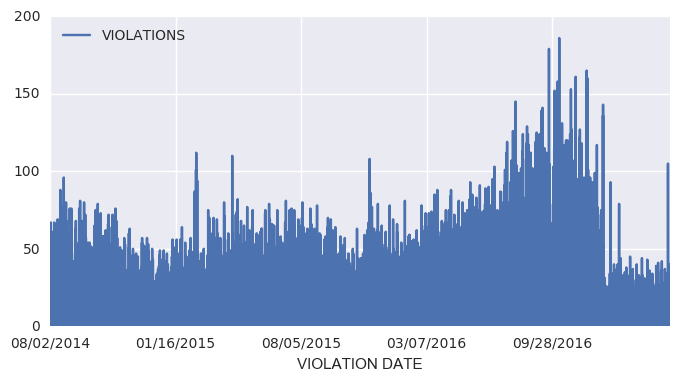

In [181]:
# The styling '-' and '--' is just to make the figure
# readable in the black & white printed version of this book.
data_vi[['VIOLATIONS']].plot(figsize=(8,4),
                               style=['-']);

- Next, we will look at the occured violences as function of the weekday:

In [191]:
data_vi.index

DatetimeIndex(['2014-08-02', '2014-07-15', '2014-07-27', '2014-08-07',
               '2014-07-23', '2014-07-11', '2014-07-04', '2014-07-26',
               '2014-08-01', '2014-07-13',
               ...
               '2015-01-29', '2014-08-22', '2016-06-20', '2015-11-24',
               '2016-06-03', '2016-07-18', '2016-01-11', '2014-08-29',
               '2015-06-11', '2015-07-06'],
              dtype='datetime64[ns]', length=246934, freq=None)

- Transform the numbers in names (Monday, Tuesday, etc.):

In [192]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 
                 'Sunday'])
data_vi['Weekday'] = days[data_vi.index.weekday]

In [193]:
data_vi['Weekday']

2014-08-02     Saturday
2014-07-15      Tuesday
2014-07-27       Sunday
2014-08-07     Thursday
2014-07-23    Wednesday
2014-07-11       Friday
2014-07-04       Friday
2014-07-26     Saturday
2014-08-01       Friday
2014-07-13       Sunday
2014-07-16    Wednesday
2014-08-07     Thursday
2014-07-17     Thursday
2014-08-03       Sunday
2014-07-11       Friday
2014-07-26     Saturday
2014-08-06    Wednesday
2014-07-10     Thursday
2014-07-06       Sunday
2014-08-03       Sunday
2014-07-12     Saturday
2014-07-08      Tuesday
2014-07-30    Wednesday
2014-07-23    Wednesday
2014-08-07     Thursday
2014-07-17     Thursday
2014-07-19     Saturday
2014-08-01       Friday
2014-07-06       Sunday
2014-08-04       Monday
                ...    
2015-01-29     Thursday
2014-10-16     Thursday
2015-01-05       Monday
2015-07-02     Thursday
2016-04-15       Friday
2014-09-10    Wednesday
2016-03-05     Saturday
2015-11-20       Friday
2016-08-31    Wednesday
2015-04-27       Monday
2015-11-02      

- Let's analyze how the violations are distributed ver the weekdays.
- For this, we need to group the table by the weekday. 
- The `groupby` method lets us do just that. Once grouped, we can sum all rows in every group.

In [194]:
data_vi_week = data_vi.groupby('Weekday').sum()

In [195]:
data_vi_week

,VIOLATIONS
Weekday,
Friday,213301
Monday,179787
Saturday,226834
Sunday,203640
Thursday,194362
Tuesday,183077
Wednesday,186027


- Let's display this information in a figure. 
- We first need to reorder the table by the weekday using ix (indexing operation). 
- Then, we plot the table, specifying the line width and the figure size.

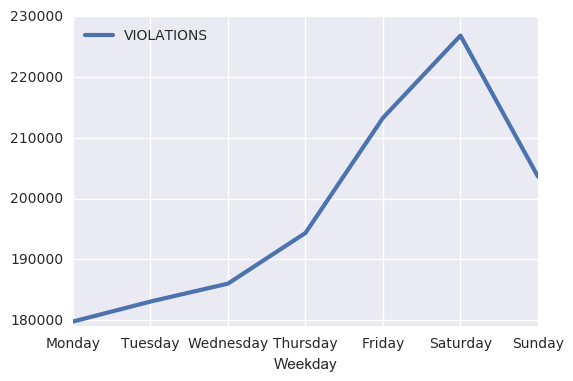

In [203]:
data_vi_week.ix[days].plot(lw=3, figsize=(6,4));
plt.ylim(179000);  # Set the bottom axis to 179000.

- Display the locations of the violations:

In [11]:
data.columns

Index(['INTERSECTION', 'CAMERA ID', 'ADDRESS', 'VIOLATION DATE', 'VIOLATIONS',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [12]:
v_lng = data.LONGITUDE
v_lat = data.LATITUDE

- Before making a plot, we have to get the coordinates of points in pixels instead of geographical coordinates.
- We will create a function that performs Mercator projection:

In [14]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [15]:
vx, vy = lat_lng_to_pixels(v_lat, v_lng)

- Plot the locations:

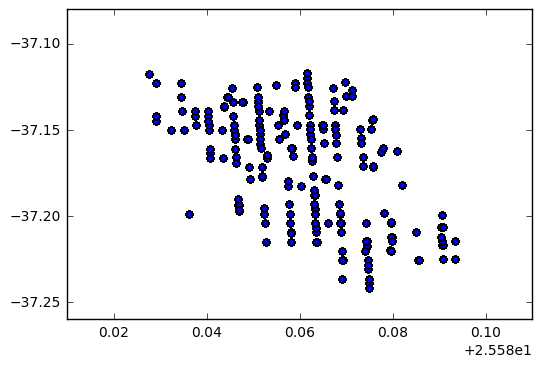

In [17]:
plt.scatter(vx, vy)

- Let's make it more appealing. `matplotlib` is highly customizable. Here is an example:

(25.600000000000001, 25.68, -37.25, -37.100000000000001)

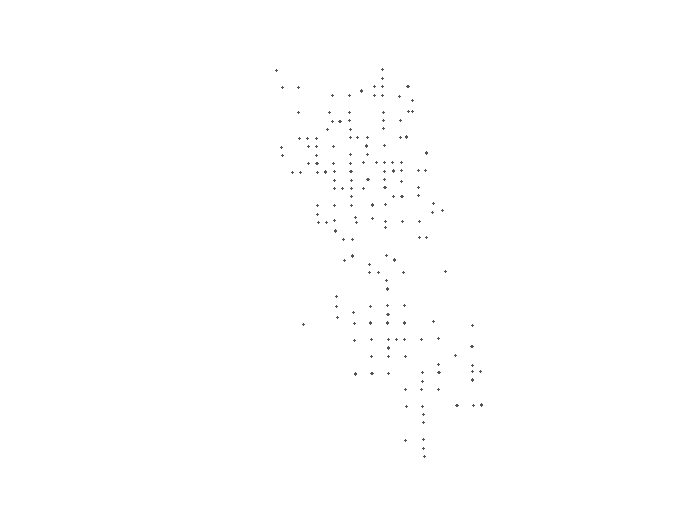

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(vx, vy, s=.1, alpha=.03)
plt.axis('equal')
plt.xlim(25.6, 25.68)
plt.ylim(-37.25, -37.10)
plt.axis('off')

- `matplotlib` sometimes require a significant amount of manual tuning to have clean, publication-ready figures.
- Other alternative is `seaborn` (needs to be installed).

### E. Some useful references: